In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [96]:
u = lambda x: x * 1.5
f = lambda x: x ** 2
g = lambda x: x ** 3
h = lambda x: x ** 4
e = lambda x: np.exp(x)

x_vals = np.linspace(1,9)

## Object Oriented Usage Style

**Explicitly create Figures using the class hierachy**

* Figure: main object
    * Artists: members of Figure
        * Axe: "Koordinatenkreuz" 
            * Axis (2+): "Achsen des Koordinatenkreuz"
        * Labels
        * Legends
        * ...

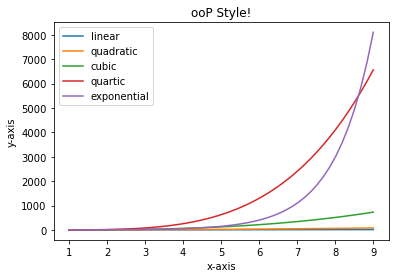

In [103]:
# creates a figure with an attached axe
fig, ax = plt.subplots()  # ooP style still uses plt for instantiaion


# plot pairs of np.array on axe
ax.plot(
    x_vals,     
    u(x_vals),
    label = "linear"
)  

ax.plot(
    x_vals,     
    f(x_vals),
    label = "quadratic"
)  

ax.plot(
    x_vals,     
    g(x_vals),
    label="cubic"
    )

ax.plot(
    x_vals,     
    h(x_vals),
    label="quartic"
    )

ax.plot(
    x_vals,     
    e(x_vals),
    label="exponential"
    )



# set additional properties
ax.set_xlabel("x-axis")  # label x axis (of axe obj)
ax.set_ylabel("y-axis")  #  ...  y ...

ax.set_title("ooP Style!")
ax.legend()

## Pyplot-Usage Style

pyplot module automatically creates and manages figures and axes

*plt acts as a universal interface*

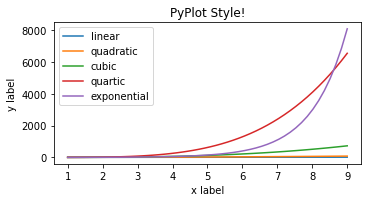

In [101]:
plt.figure(figsize=(5, 2.7), layout="constrained")

# plot on axe
plt.plot(x_vals, u(x_vals), label="linear")
plt.plot(x_vals, f(x_vals), label="quadratic")
plt.plot(x_vals, g(x_vals), label="cubic")
plt.plot(x_vals, h(x_vals), label="quartic")
plt.plot(x_vals, e(x_vals), label="exponential")

# configure artists
plt.xlabel("x label")
plt.ylabel("y label")
plt.title("PyPlot Style!")
plt.legend()


## Helper Template function


```python
def my_plotter(ax, data1, data2, param_dict):
    """ A helper function to make a graph."""
    out = ax.plot(data1, data2, **param_dict)
    return out
```

In [124]:
def my_plotter(ax, data1, data2, param_dict):
    out = ax.plot(data1, data2, **param_dict)
    return out

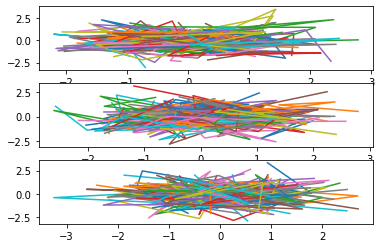

In [132]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)

D = {
    "label": "A",
}

my_plotter(ax1, np.random.randn(4,100), np.random.randn(4,100), D)
my_plotter(ax2, np.random.randn(4,100), np.random.randn(4,100), D)
my_plotter(ax3, np.random.randn(4,100), np.random.randn(4,100), D)